<a href="https://www.kaggle.com/code/maryamkamelan/stock-market-prediction?scriptVersionId=204508256" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<p style="text-align:center;">
    <img src="/kaggle/input/images/StockMarket.jpg" width="500" height="400" />
</p>

<p style="text-align: center; font-size: 24px;"><strong>Stock Market Prediction 📈</strong></p>


## Project Overview 🚀
---

In this project, we leverage historical stock market data to train an LSTM model. The model learns from past price patterns and trends, enabling it to predict future stock prices. The LSTM network is specifically designed to capture long-term dependencies and has proven to be effective in time series forecasting tasks.


## Dataset 📊
---

We use a publicly available dataset containing historical stock prices of Caterpillar Inci .s. The dataset includes features like opening price, closing price, volume, etc. We preprocess the data, split it into training and testing sets, perform any necessary data transformations and tune hyperparameters to get better results. 🌟🌟


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
data = pd.read_csv('CAT_2006-01-01_to_2018-01-01.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,57.87,58.11,57.05,57.80,3697500,CAT
1,2006-01-04,57.95,59.43,57.55,59.27,4577200,CAT
2,2006-01-05,59.02,59.86,59.00,59.27,4590700,CAT
3,2006-01-06,59.47,60.76,59.38,60.45,5692300,CAT
4,2006-01-09,60.45,61.68,60.45,61.55,4409300,CAT


In [3]:
data.tail()

,Date,Open,High,Low,Close,Volume,Name
3015,2017-12-22,154.77,155.80,153.95,155.75,2486378,CAT
3016,2017-12-26,156.04,156.98,155.66,156.44,1870565,CAT
3017,2017-12-27,156.94,157.69,156.31,157.52,2520486,CAT
3018,2017-12-28,157.94,158.65,157.23,158.42,4064049,CAT
3019,2017-12-29,158.05,158.50,157.51,157.58,2616142,CAT


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 3020 entries, 0 to 3019

Data columns (total 7 columns):

 #   Column  Non-Null Count  Dtype  

---  ------  --------------  -----  

 0   Date    3020 non-null   object 

 1   Open    3019 non-null   float64

 2   High    3019 non-null   float64

 3   Low     3019 non-null   float64

 4   Close   3020 non-null   float64

 5   Volume  3020 non-null   int64  

 6   Name    3020 non-null   object 

dtypes: float64(4), int64(1), object(2)

memory usage: 165.3+ KB


In [5]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
data['Date'].info()

<class 'pandas.core.series.Series'>

RangeIndex: 3020 entries, 0 to 3019

Series name: Date

Non-Null Count  Dtype         

--------------  -----         

3020 non-null   datetime64[ns]

dtypes: datetime64[ns](1)

memory usage: 23.7 KB


In [7]:
data.describe()

,Date,Open,High,Low,Close,Volume
count,3020,3019.000000,3019.000000,3019.000000,3020.000000,3.020000e+03
mean,2012-01-01 14:54:59.602649088,80.479881,81.304230,79.568470,80.480182,7.047746e+06
min,2006-01-03 00:00:00,22.650000,23.290000,21.710000,22.170000,1.775920e+05
25%,2009-01-01 12:00:00,68.445000,69.220000,67.610000,68.447500,4.463115e+06
50%,2011-12-29 12:00:00,81.820000,82.580000,80.760000,81.765000,6.029723e+06
75%,2014-12-31 12:00:00,93.660000,94.460000,92.805000,93.547500,8.464417e+06
max,2017-12-29 00:00:00,158.050000,158.650000,157.510000,158.420000,6.780610e+07
std,NaN,20.922491,20.916641,20.928699,20.945808,4.216400e+06


In [8]:
missing_values = data.isnull().sum()
missing_values

Date      0
Open      1
High      1
Low       1
Close     0
Volume    0
Name      0
dtype: int64

In [9]:
data.dropna(inplace=True)  # Drop rows with any missing values

In [10]:
# Check for NaN values in the entire DataFrame
nan_values = data.isna().any().any()
nan_values

False

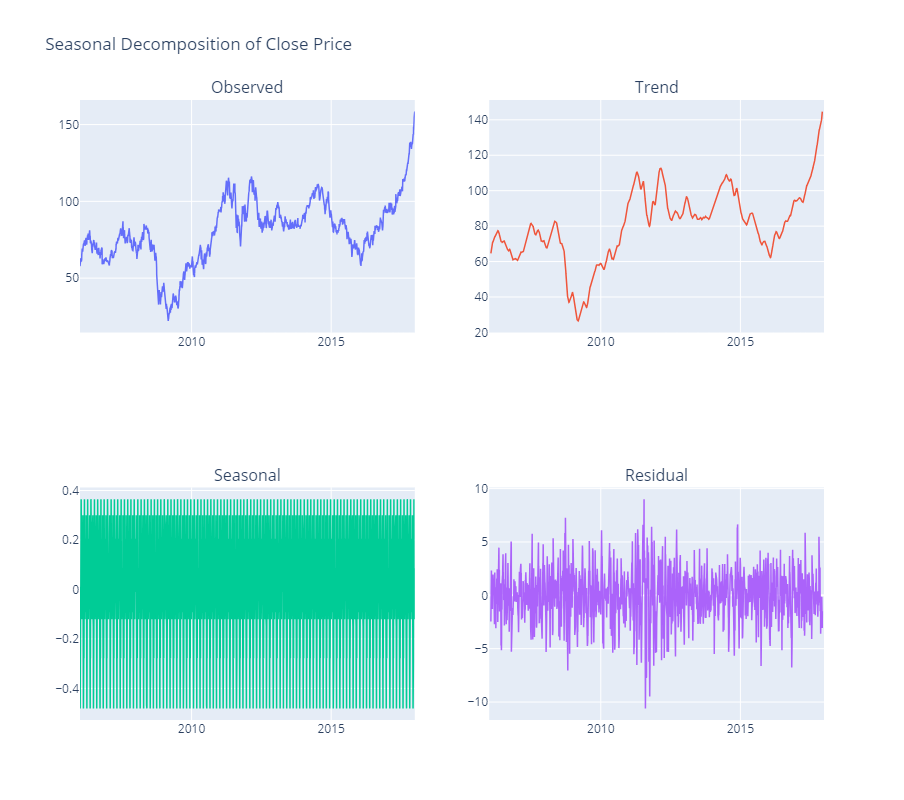

In [12]:
# Using time series decomposition to identify seasonal patterns and overall trends in the 'Close' price
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

# Perform seasonal decomposition
result = seasonal_decompose(data['Close'], model='additive', period=30)

# Create subplots: 2 rows, 2 columns
fig = make_subplots(rows=2, cols=2, subplot_titles=('Observed', 'Trend', 'Seasonal', 'Residual'))

# Add traces for each component
fig.add_trace(go.Scatter(x=data['Date'], y=result.observed, mode='lines', name='Observed', line=dict(width=1.5)), row=1, col=1)
fig.add_trace(go.Scatter(x=data['Date'], y=result.trend, mode='lines', name='Trend', line=dict(width=1.5)), row=1, col=2)
fig.add_trace(go.Scatter(x=data['Date'], y=result.seasonal, mode='lines', name='Seasonal', line=dict(width=1.5)), row=2, col=1)
fig.add_trace(go.Scatter(x=data['Date'], y=result.resid, mode='lines', name='Residual', line=dict(width=1.5)), row=2, col=2)

# Update layout for better visualization
fig.update_layout(height=800, width=1200, title_text='Seasonal Decomposition of Close Price', showlegend=False)

# Show plot
fig.show()

<div style="background-color: #f0f0ff; padding: 10px; border: 2px solid #8a2be2;">
    
1. Observed Component:
The observed component is the original time series data (data['Close']).
    
2. Trend Component:
The trend component represents the long-term movement or tendency of the data after removing short-term fluctuations and seasonal effects.
Interpretation:
Upward Trend: If the trend line shows a consistent increase over time, it indicates a long-term upward movement in the data.
Downward Trend: Conversely, a decreasing trend suggests a long-term decline in the data.
Flat Trend: A flat trend line indicates stability or no significant long-term change in the data.
    
3. Seasonal Component:
The seasonal component captures regular, periodic fluctuations in the data that recur at fixed intervals (e.g., daily, weekly, monthly).
Interpretation:
The amplitude (height) of seasonal fluctuations indicates the strength of seasonality in your data. Higher peaks or deeper troughs indicate stronger seasonal effects.
    
4. Residual Component:
The residual component represents the irregular or random fluctuations in the data that remain after removing the trend and seasonal components.
Interpretation:
A well-decomposed time series should ideally have residuals that appear as random noise with zero mean.
Patterns may suggest that some underlying factors are not accounted for in the decomposition (e.g., outliers, structural breaks).

    *Practical Insights:
    Understanding the trend and seasonal components helps in making better forecasts by separating systematic patterns from random fluctuations.

    Residual analysis can help detect anomalies or unusual events in the data that are not explained by the trend or seasonality.

    Insights from decomposition can guide the selection of appropriate time series models by identifying the need for trend and seasonal components in the model specification.
</div>

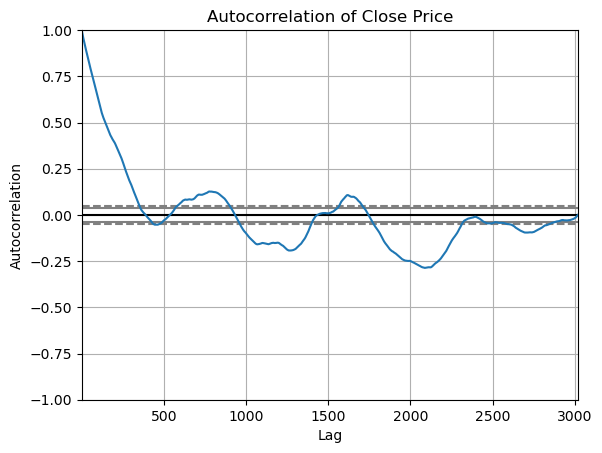

In [13]:
pd.plotting.autocorrelation_plot(data['Close'])
plt.title('Autocorrelation of Close Price')
plt.show()

<div style="background-color: #f0f0ff; padding: 10px; border: 2px solid #8a2be2;">
The y-axis represents the autocorrelation coefficient, which ranges from -1 to 1. 
    
This coefficient measures the similarity between the time series and its lagged version:  

A value close to 1 indicates a strong positive correlation.  
A value close to -1 indicates a strong negative correlation.  
A value close to 0 indicates little or no correlation.  
</div>

In [14]:
df = data.copy()
df.drop(columns=['Name', 'Date'], inplace=True)

# Extract month and day into separate columns
# As I know the month and day are important in stock market analysis
df['Month'] = data['Date'].dt.month
df['Day'] = data['Date'].dt.day

df.info()

<class 'pandas.core.frame.DataFrame'>

Index: 3019 entries, 0 to 3019

Data columns (total 7 columns):

 #   Column  Non-Null Count  Dtype  

---  ------  --------------  -----  

 0   Open    3019 non-null   float64

 1   High    3019 non-null   float64

 2   Low     3019 non-null   float64

 3   Close   3019 non-null   float64

 4   Volume  3019 non-null   int64  

 5   Month   3019 non-null   int32  

 6   Day     3019 non-null   int32  

dtypes: float64(4), int32(2), int64(1)

memory usage: 165.1 KB


In [15]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Month', 'Day']
X = df[features].values
X.shape

(3019, 7)

In [16]:
# Split the data into training and test sets
X_train, X_test = X[:2500], X[2500:]
X_train.shape

(2500, 7)

In [17]:
# Normalize the data
scaler = MinMaxScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

In [18]:
# Function to create sequences
def create_sequences(data, seq_length, target_column_index):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length, target_column_index])
    return np.array(X), np.array(y)

In [19]:
# Define sequence length (number of time steps)
seq_length = 90
target_column_index = 3  # 'Close' column is at index 3
XT, yT = [], []

# Create sequences for training data
XT, yT = create_sequences(Xs_train, seq_length, target_column_index)
# Create sequences for test data
Xt, yt = create_sequences(Xs_test, seq_length, target_column_index)

# Reshape X to 3D array (samples, time steps, features)
XT = np.reshape(XT, (XT.shape[0], XT.shape[1], len(features)))
Xt = np.reshape(Xt, (Xt.shape[0], Xt.shape[1], len(features)))

# Print shapes for verification
print("Xtrain shape:", XT.shape)
print("ytrain shape:", yT.shape)
print("Xtest shape:", Xt.shape)
print("ytest shape:", yt.shape)

Xtrain shape: (2410, 90, 7)

ytrain shape: (2410,)

Xtest shape: (429, 90, 7)

ytest shape: (429,)


In [37]:
# Define LSTM model
model = Sequential()

# Add LSTM layers with dropout for regularization
model.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(XT.shape[1], XT.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='tanh', return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
# Add a Dense layer for final prediction
model.add(Dense(units=1))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 90, 128)             │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 90, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,153 (473.25 KB)

 Trainable params: 121,153 (473.25 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Compile model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [39]:
# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.keras',  
    monitor='val_loss',        # Metric to monitor
    save_best_only=True,       
    mode='min',                # We want to minimize the monitored metric
    verbose=1                  
)

# Fit the model with the callback
history = model.fit(
    XT, yT,
    epochs=20,
    batch_size=40,
    shuffle=False,
    validation_data=(Xt, yt),  
    callbacks=[checkpoint_callback]
)

# Load the best weights after training
model.load_weights('best_model.keras')

Epoch 1/20

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.1493

Epoch 1: val_loss improved from inf to 0.13290, saving model to best_model.keras

61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - loss: 0.1487 - val_loss: 0.1329

Epoch 2/20

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0697

Epoch 2: val_loss improved from 0.13290 to 0.11703, saving model to best_model.keras

61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 0.0698 - val_loss: 0.1170

Epoch 3/20

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0736

Epoch 3: val_loss did not improve from 0.11703

61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 0.0737 - val_loss: 0.2651

Epoch 4/20

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.1038

Epoch 4: val_loss did not improve from 0.11703

61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - loss: 0.1042 - val_loss: 0.1555

Epoch 5/20

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.1026

Epoch 5: val_loss improved from 0.11703 to 0.11409, saving model to best_model.keras



In [40]:
model.evaluate(Xt, yt)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0370


0.05448753386735916

In [41]:
XTPredicted = model.predict(XT)
XtPredicted = model.predict(Xt)
XFinal = np.concatenate([XTPredicted, XtPredicted], axis=0)
XFinal.shape

76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


(2839, 1)

In [42]:
XActual = np.concatenate([Xs_train, Xs_test], axis=0)
XActual[:,3].shape

(3019,)

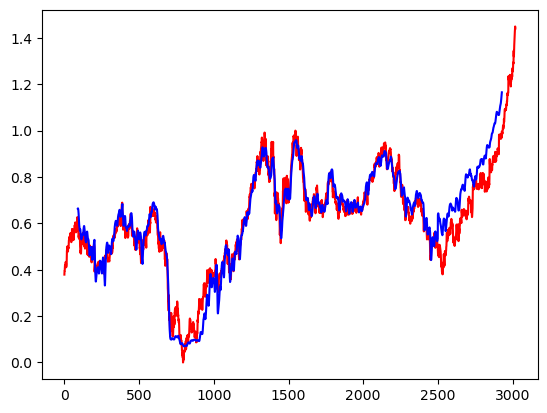

In [43]:
plt.plot(XActual[:,3], color='red')
shifted_x = np.arange(90, len(XFinal) + 90)
plt.plot(shifted_x, XFinal , color='blue')

<p style="text-align:center;">
<img src="D:\FanapFiloger\Exercise\10\TheEnd.gif" width="300" height="200" />
</p>